# Olympic Athletes' Height Analysis
## Summer Olympic Games (1960-2016)
### Combining Olympic and World Height data
This notebook compares Olympic athletes' height with that of the general population.


### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import os
from pprint import pprint
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm 

### Importing Clean, Summer Men's data (for 84 events)

In [2]:
# grab the cleaned, men's summer games olympic data
olympic_file = os.path.join("..","data", "cleanData","Mens_OlympicData_1960_2016.csv")
olympic_df = pd.read_csv(olympic_file, encoding="ISO-8859-1")

# To get the raw data count, commented out to keep the original df .head() results prominent
athlete_count = len(olympic_df)

# preview the raw data
olympic_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,MedalYN,Sub Event,Games Count
0,1,A Dijiang,M,24.0,70.866142,176.369954,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,No,Basketball Basketball,15
1,136,Alessandro Abbio,M,29.0,76.771654,187.393076,Italy,ITA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,No,Basketball Basketball,15
2,192,Ahmed El-Sayed Abdel Hamid Mobarak,M,25.0,74.409449,187.393076,Egypt,EGY,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,NaN,No,Basketball Basketball,15
3,199,Amir Abdel Meguid,M,23.0,70.078740,147.709836,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,NaN,No,Basketball Basketball,15
4,199,Amir Abdel Meguid,M,27.0,70.078740,147.709836,Egypt,EGY,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,NaN,No,Basketball Basketball,15


### Importing the global height data

In [3]:
# grab the cleaned, men's summer games olympic data
global_file = os.path.join("..","data", "cleanData","Mens_WorldHeight_1960_2016.csv")
global_df = pd.read_csv(global_file, encoding="ISO-8859-1")

# preview the raw data
global_df.head()

,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm),Mean height (inches),Mean height lower 95% uncertainty interval (inches),Mean height upper 95% uncertainty interval (inches),Olympic Year
0,Afghanistan,AFG,Men,1936,163.165960,157.968732,168.464454,64.238567,62.192414,66.324588,1960
1,Albania,ALB,Men,1936,169.049928,166.579093,171.437500,66.555090,65.582320,67.495079,1960
2,Algeria,DZA,Men,1936,169.019842,167.525109,170.519953,66.543245,65.954767,67.133840,1960
3,American Samoa,ASM,Men,1936,171.394088,170.505356,172.338239,67.477987,67.128093,67.849700,1960
4,Andorra,AND,Men,1936,168.641887,163.529171,173.734203,66.394444,64.381564,68.399293,1960


### Compare the overall averages (all athletes to global height data) by year
This chart zooms in on the other Gods/Mortals chart (1920-2012), between the years 1960 and 2016.


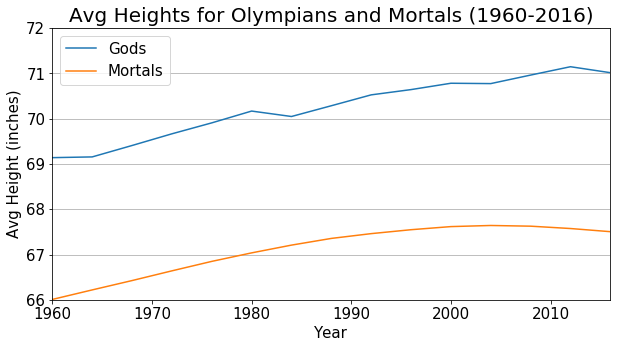

In [4]:
# group the mens data, average by year
olympicAvg_Year = pd.DataFrame(olympic_df.groupby('Year')['Height'].mean().reset_index())

# rename column
olympicAvg_Year = olympicAvg_Year.rename(columns={'Height':'Gods'})

# group the global data, average height by year
globalAvg_Year = pd.DataFrame(global_df.groupby('Olympic Year')['Mean height (inches)'].mean().reset_index())

# rename column
globalAvg_Year = globalAvg_Year.rename(columns={'Olympic Year':'Year','Mean height (inches)':'Mortals'})

# combine to plot
allAvg_Year = globalAvg_Year.merge(olympicAvg_Year,on='Year')

# allAvg_Year

overall_chart = allAvg_Year.plot(
    x='Year',
    y=['Gods','Mortals'],
    figsize=(10,5),
    ylim = (66,72),
    fontsize = 15
)

# add axis labels
overall_chart.set_xlabel("Year", fontsize=15)
overall_chart.set_ylabel('Avg Height (inches)', fontsize=15)
overall_chart.yaxis.grid(True)
overall_chart.set_title('Avg Heights for Olympians and Mortals (1960-2016)', fontdict={'fontsize': 20, 'fontweight': 'medium'})
overall_chart.legend(fontsize=15)

# save chart to folder
overall_chart.get_figure().savefig('..\images\gods_mortals_1960_2016.png')

### is the difference in mean significant?
Run a t-test comparing the means of Olympians and the world height averages.  (We are using an average of averages here).
The p-value suggests the variance is significant, meaning there is a low probability that the variance is random chance.

In [5]:
# perform a t-test on the 2 means
(t_stat, p) = stats.ttest_ind(allAvg_Year['Gods'], allAvg_Year['Mortals'])

# print results
print(f'The variance between the avg Olympian and the average peon, p={p}, is significant.')

The variance between the avg Olympian and the average peon, p=4.502043447803936e-14, is significant.


### See if the Olympic heights is interesting by sport...
Chart out the 19 sports that appear in all 15 summer games.  See how the average height trends over time.

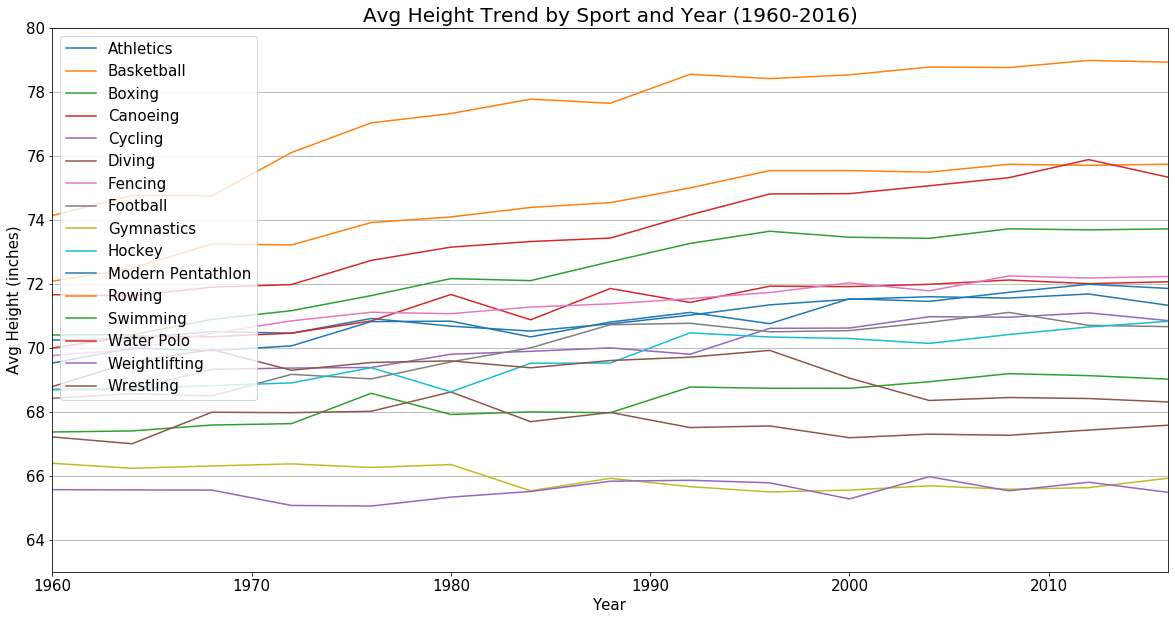

In [6]:
# get the average height by sport
sport_avg = pd.DataFrame(olympic_df.groupby(['Sport','Year'])['Height'].mean().reset_index())

sport_pvt = sport_avg.pivot(index='Year', columns='Sport', values = 'Height').reset_index()

sports = [
    'Athletics',
    'Basketball',
    'Boxing',
    'Canoeing',
    'Cycling',
    'Diving',
    'Fencing',
    'Football',
    'Gymnastics',
    'Hockey',
    'Modern Pentathlon',
    'Rowing',
    'Swimming',
    'Water Polo',
    'Weightlifting',
    'Wrestling'
]

# plot (probably a better way to do this...)
sport_chart = sport_pvt.plot(
    x = 'Year', 
    y = sports,
    figsize=(20,10),
    fontsize=15,
    ylim = (63,80),
    xlim = (1960, 2016)
)

# add axis labels
sport_chart.set_xlabel("Year", fontsize=15)
sport_chart.set_ylabel('Avg Height (inches)', fontsize=15)
sport_chart.yaxis.grid(True)
sport_chart.legend(loc='best',fontsize=15)
sport_chart.set_title('Avg Height Trend by Sport and Year (1960-2016)', fontdict={'fontsize': 20, 'fontweight': 'medium'})

sport_chart.get_figure().savefig('..\images\sports.png')


### Athletics is pretty flat, lets explode it to see if there is variance within the sport (by event)
Selecting a few of the athletic trends we thought were interesting.  There were too many to put into one chart. 

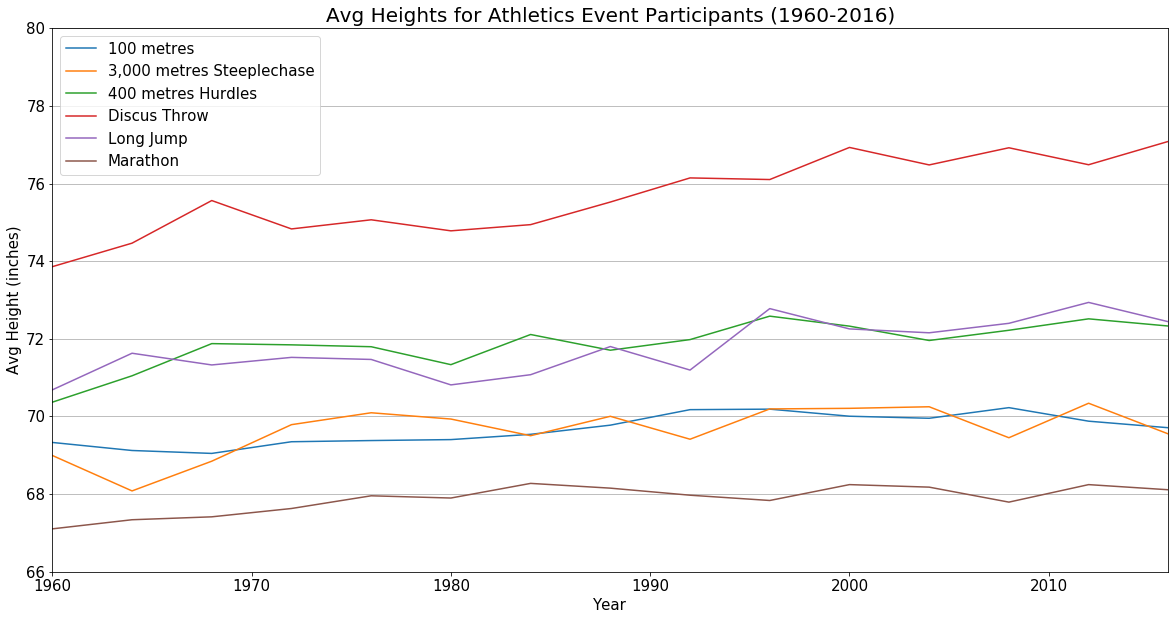

In [7]:
# new df for just athletics 
athletics_df = olympic_df.loc[olympic_df['Sport']=='Athletics']

# calculate the average by year and sub-event
athletics_Avg = pd.DataFrame(athletics_df.groupby(['Sub Event','Year'])['Height'].mean().reset_index())

# rename column
athletics_Avg = athletics_Avg.rename(columns={'Height':'Avg Height'})

# pivot for charting
athletics_pivot = athletics_Avg.pivot(index='Year', columns='Sub Event', values = 'Avg Height').reset_index()

# rename some of the columns, adjust for a better chart (pick out some of the events)
athletics_pivot = athletics_pivot.rename(columns={
    'Athletics 100 metres': '100 metres',
    'Athletics 400 metres Hurdles':'400 metres Hurdles',
    'Athletics Discus Throw':'Discus Throw',
    'Athletics Marathon':'Marathon',
    'Athletics 3,000 metres Steeplechase':'3,000 metres Steeplechase',
    'Athletics Long Jump':'Long Jump'
})

athletics_pivot.head()

columnList = [
    '100 metres',
    '3,000 metres Steeplechase',
    '400 metres Hurdles',
    'Discus Throw',
    'Long Jump',
    'Marathon'
]

athletic_chart = athletics_pivot.plot(
    x='Year',
    y = columnList,
    figsize=(20,10),
    fontsize=15,
    ylim = (66,80),
    xlim = (1960, 2016)    
)

athletic_chart.set_xlabel("Year", fontsize=15)
athletic_chart.set_ylabel('Avg Height (inches)', fontsize = 15)
athletic_chart.yaxis.grid(True)
athletic_chart.legend(loc='best',fontsize=15)
athletic_chart.set_title('Avg Heights for Athletics Event Participants (1960-2016)',fontdict={'fontsize': 20, 'fontweight': 'medium'})

athletic_chart.get_figure().savefig('..\images\\athletics.png')

### Looking at gymnastics
Gymnastics trended down, and we thought that was interesting. Charting the different Gymnastics events over time 1960-2016.

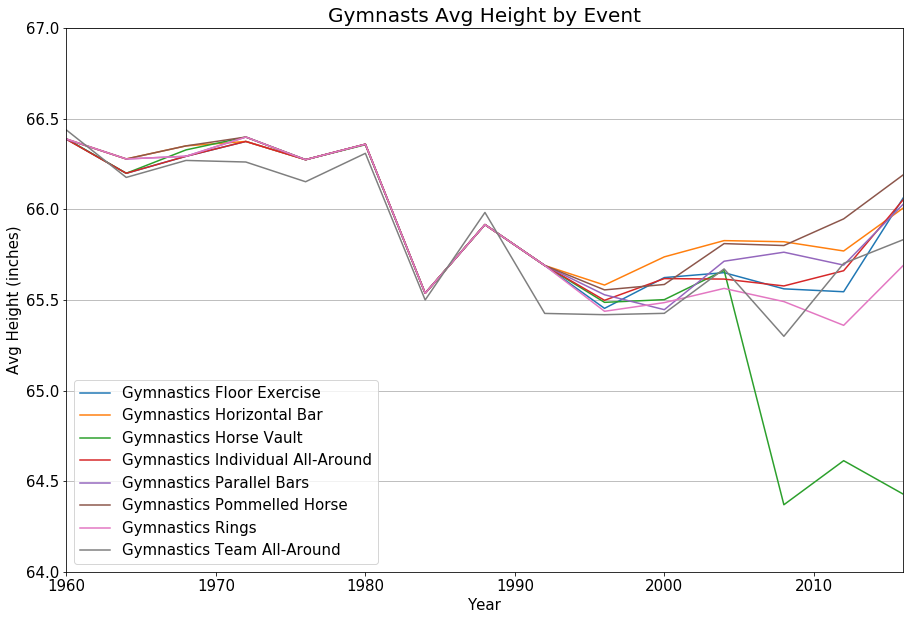

In [8]:
# new df for just athletics 
gym_df = olympic_df.loc[olympic_df['Sport']=='Gymnastics']

# calculate the average by year and sub-event
gym_Avg = pd.DataFrame(gym_df.groupby(['Sub Event','Year'])['Height'].mean().reset_index())

# rename column
gym_Avg = gym_Avg.rename(columns={'Height':'Avg Height'})

# pivot for charting
gym_pivot = gym_Avg.pivot(index='Year', columns='Sub Event', values = 'Avg Height').reset_index()

# build the column list
columns = []
for columnName, columnValues in gym_pivot.iteritems():
    if columnName != 'Year':
        columns.append(columnName)

gym_chart = gym_pivot.plot(
    x ='Year',
    y = columns,
    figsize=(15,10),
    fontsize=15,
    ylim = (64,67),
    xlim = (1960, 2016)    
)

gym_chart.set_xlabel("Year", fontsize=15)
gym_chart.set_ylabel('Avg Height (inches)', fontsize=15)
gym_chart.yaxis.grid(True)
gym_chart.legend(loc='best', fontsize=15)
gym_chart.set_title('Gymnasts Avg Height by Event', fontdict={'fontsize': 20, 'fontweight': 'medium'})

gym_chart.get_figure().savefig('..\images\gymers.png')

### Zooming in on swimming
Swimmers be getting taller!  A close look at the swimming events over time (1960-2016)

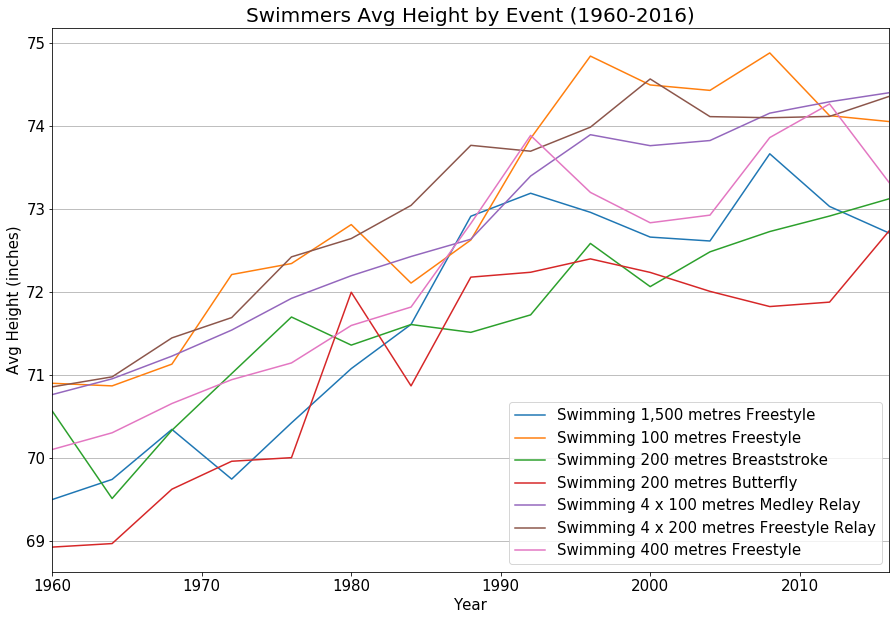

In [9]:
# new df for just athletics 
swim_df = olympic_df.loc[olympic_df['Sport']=='Swimming']

# calculate the average by year and sub-event
swim_Avg = pd.DataFrame(swim_df.groupby(['Sub Event','Year'])['Height'].mean().reset_index())

# rename column
swim_Avg = swim_Avg.rename(columns={'Height':'Avg Height'})

# pivot for charting
swim_pivot = swim_Avg.pivot(index='Year', columns='Sub Event', values = 'Avg Height').reset_index()

# build the column list
columns = []
for columnName, columnValues in swim_pivot.iteritems():
    if columnName != 'Year':
        columns.append(columnName)

swim_chart = swim_pivot.plot(
    x='Year',
    y=columns,
    figsize=(15,10),
#     title = 'Swimmers Avg Height by Event',
    fontsize = 15,
#     ylim = (64,67),
    xlim = (1960, 2016)    
)

swim_chart.set_xlabel("Year", fontsize=15)
swim_chart.set_ylabel('Avg Height (inches)', fontsize=15)
swim_chart.yaxis.grid(True)
swim_chart.legend(loc='best',fontsize=15) 
swim_chart.set_title('Swimmers Avg Height by Event (1960-2016)', fontdict={'fontsize': 20, 'fontweight': 'medium'})

swim_chart.get_figure().savefig('..\images\swimmers.png')

### By Event, is the mean height significantly different that the global average?
This was fun! We pivoted the data so that each column was an event (84).  Then we looped through the columns to perform a t-test on each one comapred to the global average height.  We stored the t-stat and p values into lists, and then put that into a dataframe.  Of the 84 events that we tested, only two cases were not significantly different. 

In [10]:
# get the average by sub-event and year
subevent_year_avg = pd.DataFrame(olympic_df.groupby(['Sub Event','Year'])['Height'].mean().reset_index())

# rename column
subevent_year_avg = subevent_year_avg.rename(columns={'Height':'Avg Height'})

# pivot
subevent_pivot = subevent_year_avg.pivot(index='Year', columns='Sub Event', values = 'Avg Height').reset_index()

# merge with global height avg
# subevent_pivot = subevent_pivot.merge(globalAvg_Year, on='Year')

# loop through, calculating a t-test for each event (against world height avg)
sub_events = []
t_stats = []
ps = []

for columnName, columnData in subevent_pivot.iteritems():
    # if not the year, perform the t-test
    if columnName != 'Year':
        # t-test
        (t_stat, p) = stats.ttest_ind(columnData.values, globalAvg_Year['Mortals'])
                
        # append the values to lists...
        sub_events.append(columnName)
        t_stats.append(t_stat)
        ps.append(p)


        
        
# put results into a dataframe
subEvent_vs_global = pd.DataFrame({
    'Sub Event': sub_events,
    't Stat': t_stats,
    'p': ps
})



# find out where variance in height matters (both tails)
sigEvent_Global = subEvent_vs_global.loc[subEvent_vs_global['p']<0.05]

# sigEvent_Global.head(20)

subevents_sig_count = len(sigEvent_Global)

print(f'Of the 84 events, the participants in {subevents_sig_count} of them are significantly different than the global height avg')


Of the 84 events, the participants in 82 of them are significantly different than the global height avg


### since so many p-values are close to zero, make sure it's ok
A friend at work helped here, he suggested that we do a distribution of the 84 p-values to make sure the cluster around 0 was real.  We're not sure we fully understand that, but he seemed to think it looked ok :)

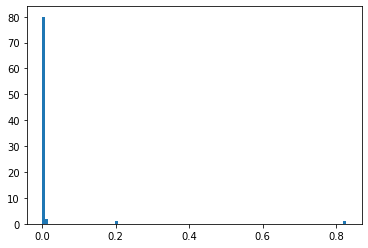

In [11]:
# multiple testing adjustment for p-values, since so many p values are significant
n, bins, patches = plt.hist(
    x=ps,
    bins=100
)

# pdist = plt.plot.bar(bins)
# breaking the p-values into 100 bins should spread the data out.  

### Which 2 events are not significantly different from global height avg?
The two events where the participants' average height was not significantly different from the global population average, were Boxing (lightweight) and Diving Platform.

In [12]:
# use loc...
unsigEvent_Global = subEvent_vs_global.loc[subEvent_vs_global['p']>=0.05]

unsigEvent_Global.head()

,Sub Event,t Stat,p
29,Boxing Lightweight,-0.220309,0.827229
39,Diving Platform,1.316409,0.198711


### Medalists vs Non-Medalists
#### Sidebar
Disclosure, some variable names use the term "losers" to describe Olympic athletes that do not medal, this is just because we are lazy and don't want to type out "non_medalists" every time.  All Olympians are amazing!  The odds of a college athlete getting drafted by the NBA is 0.02%, to make an Olympic swimming team it's about 0.0013%.  They are all truly outliers. https://www.yourswimlog.com/what-are-my-chances-of-going-to-the-olympics/

#### Thank you, now back to documentation
Splitting out all Olympians into 2 data frames, medalists (winners) and non-medalists (losers).  We then combine the two data frames, which gives us the year column and 84 x 2 number of columns, 15 rows (1 for each Olympiad).  The pivoted value is average height in inches.  The combination applies an "_x" and "_y" on each set of 84 columns.  "x" = medalist (winners) and "y" = non-medalists (losers)

In [13]:
# create 2 datasets, one for winners and one for losers
winners_df = olympic_df.loc[olympic_df['MedalYN']=='Yes']
losers_df = olympic_df.loc[olympic_df['MedalYN']=='No']

# get the avg heights by year and sub event
winners_avg = pd.DataFrame(winners_df.groupby(['Sub Event','Year'])['Height'].mean().reset_index())
losers_avg = pd.DataFrame(losers_df.groupby(['Sub Event','Year'])['Height'].mean().reset_index())

# rename columns
winners_avg = winners_avg.rename(columns={'Height':'Avg Height'})
losers_avg = losers_avg.rename(columns={'Height': 'Avg Height'})

# pivot each one...
winners_pivot = winners_avg.pivot(index='Year', columns='Sub Event', values = 'Avg Height').reset_index()
losers_pivot = losers_avg.pivot(index='Year', columns='Sub Event', values = 'Avg Height').reset_index()

# combine them all into 1 merge...
all_pivot = winners_pivot.merge(losers_pivot,on='Year')

# combined output
all_pivot.head()



Sub Event,Year,"Athletics 1,500 metres_x","Athletics 10,000 metres_x",Athletics 100 metres_x,Athletics 110 metres Hurdles_x,Athletics 20 kilometres Walk_x,Athletics 200 metres_x,"Athletics 3,000 metres Steeplechase_x",Athletics 4 x 100 metres Relay_x,Athletics 4 x 400 metres Relay_x,...,"Wrestling Featherweight, Freestyle_y","Wrestling Featherweight, Greco-Roman_y","Wrestling Heavyweight, Freestyle_y","Wrestling Heavyweight, Greco-Roman_y","Wrestling Light-Heavyweight, Freestyle_y","Wrestling Light-Heavyweight, Greco-Roman_y","Wrestling Middleweight, Freestyle_y","Wrestling Middleweight, Greco-Roman_y","Wrestling Welterweight, Freestyle_y","Wrestling Welterweight, Greco-Roman_y"
0,1960,69.947507,67.979003,72.309711,73.097113,70.341207,69.816273,67.716535,70.997375,71.751969,...,65.710536,65.673041,72.138098,73.053368,70.393701,70.416198,69.389764,69.010124,68.048073,68.298528
1,1964,70.997375,70.209974,69.553806,72.572178,70.472441,71.784777,69.553806,69.685039,72.178478,...,65.979620,65.541807,72.401575,73.474409,71.138704,71.994751,71.471835,70.773506,68.635171,68.577756
2,1968,72.047244,67.716535,70.734908,71.916010,69.816273,73.753281,69.685039,69.160105,71.391076,...,65.019685,65.768753,74.230494,73.851706,72.774076,72.652938,70.866142,70.447835,69.512795,68.875766
3,1972,71.259843,67.847769,72.047244,73.097113,70.866142,72.047244,69.160105,70.866142,70.472441,...,65.850736,65.526575,72.743792,72.118826,70.826772,72.125984,69.835021,70.103346,68.391451,68.479331
4,1976,72.965879,68.897638,71.522310,73.753281,69.816273,70.603675,71.391076,70.341207,72.309711,...,64.932508,65.466817,72.473753,72.598425,71.746179,72.637795,69.685039,70.472441,69.006999,68.687664


### perform t-tests on all 84 events, to see difference in height is significant between medalist/non-medalist
More fun!  Looping through all 169 columns, if the column ends in an "_x", meaning that it is a column of winners.  Then it loops through the column again, there is another if statement to see if the column = the base column name (column name - "_x"), then run the t-test comparing the two columnData series.  This way each of the 84 events gets 1 t-test comparing medalists and non-medalists.  We put the results into a data frame, and then looked at all of them where the p-value was less than 0.05.

In [14]:
# initialize lists to capture t-test results
sub_events = []
t_stats = []
ps = []

for (xColumnName,xColumnData) in all_pivot.iteritems(): 
    
    # if the column ends in an x, calculate the t-test
    if  xColumnName[-2:]=='_x':
        
        # strip off the trailing _x so we can call the y version
        column = xColumnName.strip('_x')
        
        # loop through the columns one more time, to catch the Y version
        for (yColumnName, yColumnData) in all_pivot.iteritems():
            
            # if the y columname matches the x column namme base (column) + "_y", then do the t-test
            if yColumnName == column + '_y':
                
                # t-test
                (t_stat, p) = stats.ttest_ind(xColumnData.values, yColumnData.values)
                
                
                # append the values to lists...
                sub_events.append(column)
                t_stats.append(t_stat)
                ps.append(p)

# create a dataframe to display results
subEvent_df = pd.DataFrame({
    'Olympic Event': sub_events,
    'T_stat': t_stats,
    'p': ps
})

# find out where variance in height matters (both tails)
sigEvent = subEvent_df.loc[subEvent_df['p']<0.05]

sigEvent = sigEvent.sort_values(by=['p'])

sigEvent.head(50)

# len(sigEvent)

,Olympic Event,T_stat,p
2,Athletics 100 metres,6.094288,0.000001
10,Athletics 400 metres Hurdles,5.334984,0.000011
16,Athletics High Jump,4.382135,0.000150
52,Gymnastics Team All-Around,-4.229536,0.000226
9,Athletics 400 metres,4.060158,0.000358
48,Gymnastics Individual All-Around,-4.028421,0.000389
61,Swimming 100 metres Freestyle,3.878010,0.000582
63,Swimming 200 metres Butterfly,3.867884,0.000598
5,Athletics 200 metres,3.846759,0.000633
27,Boxing Light-Heavyweight,3.785355,0.000745


# Taking what we learned in class right before the presentation, Distributions!
We grabbed a handful of events that had the lowest p-values and did some distributions!

### Zooming in on the "Usain Bolt" effect in the 100 Meter

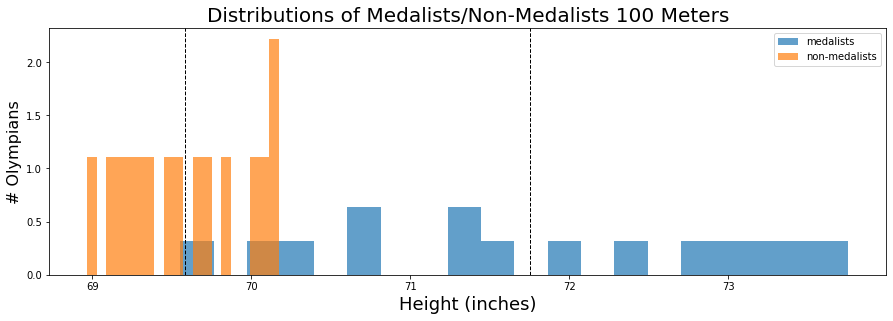

In [15]:
# Histogram Plot of Data


plt.figure(figsize=(15,10))

plt.subplot(2, 1, 2)
plt.title('Distributions of Medalists/Non-Medalists 100 Meters', fontsize=20)
plt.xlabel('Height (inches)', fontsize=18)
plt.ylabel('# Olympians', fontsize=16)
plt.hist(winners_pivot['Athletics 100 metres'], 20, density=True, alpha=0.7, label="medalists")
plt.hist(losers_pivot['Athletics 100 metres'], 20, density=True, alpha=0.7, label="non-medalists")
plt.axvline(winners_pivot['Athletics 100 metres'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(losers_pivot['Athletics 100 metres'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 


plt.savefig('..\images\dist_100_meters.png')

### Swimmers too

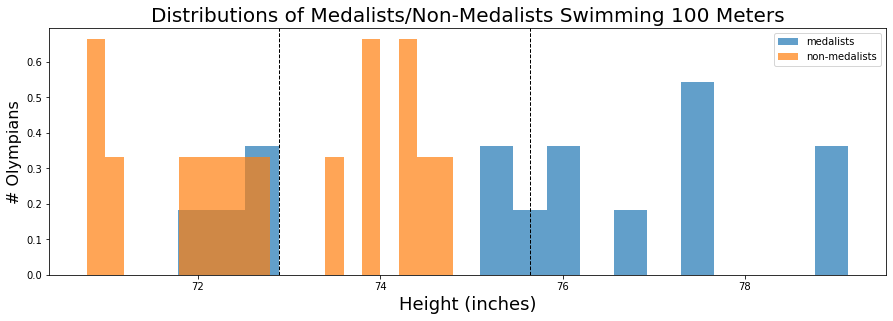

In [16]:


plt.figure(figsize=(15,10))

plt.subplot(2, 1, 2)
plt.title('Distributions of Medalists/Non-Medalists Swimming 100 Meters', fontsize=20)
plt.xlabel('Height (inches)', fontsize=18)
plt.ylabel('# Olympians', fontsize=16)
plt.hist(winners_pivot['Swimming 100 metres Freestyle'], 20, density=True, alpha=0.7, label="medalists")
plt.hist(losers_pivot['Swimming 100 metres Freestyle'], 20, density=True, alpha=0.7, label="non-medalists")
plt.axvline(winners_pivot['Swimming 100 metres Freestyle'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(losers_pivot['Swimming 100 metres Freestyle'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 


plt.savefig('..\images\dist_100_swimming.png')


## Taller not always better!
### Looking at gymnastics team

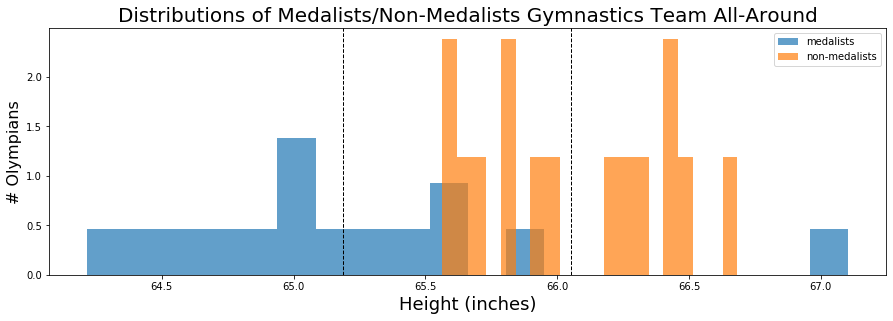

In [17]:
# Histogram Plot of Data


plt.figure(figsize=(15,10))

plt.subplot(2, 1, 2)
plt.title('Distributions of Medalists/Non-Medalists Gymnastics Team All-Around', fontsize=20)
plt.xlabel('Height (inches)', fontsize=18)
plt.ylabel('# Olympians', fontsize=16)
plt.hist(winners_pivot['Gymnastics Team All-Around'], 20, density=True, alpha=0.7, label="medalists")
plt.hist(losers_pivot['Gymnastics Team All-Around'], 20, density=True, alpha=0.7, label="non-medalists")
plt.axvline(winners_pivot['Gymnastics Team All-Around'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(losers_pivot['Gymnastics Team All-Around'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 


plt.savefig('..\images\dist_gymnastics_team.png')

In [18]:
## Looking at all Olympians, medalists vs non-medalists

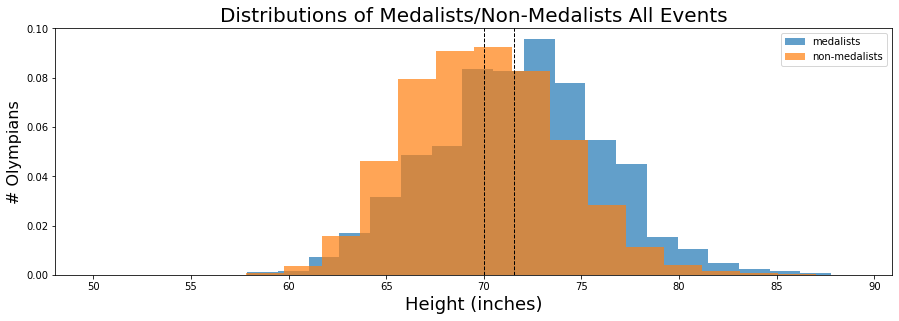

In [19]:
# chart the distribution of all medalists vs non-medalists
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 2)
plt.title('Distributions of Medalists/Non-Medalists All Events', fontsize=20)
plt.xlabel('Height (inches)', fontsize=18)
plt.ylabel('# Olympians', fontsize=16)
plt.hist(winners_df['Height'], 20, density=True, alpha=0.7, label="medalists")
plt.hist(losers_df['Height'], 20, density=True, alpha=0.7, label="non-medalists")
plt.axvline(winners_df['Height'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(losers_df['Height'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

plt.savefig('..\images\dist_allOlympians.png')
# plt.get_figure().savefig('..\images\medalist_nonmedalist_dist.png')

# For fun matching on olympic year and country
### Create the olympian avg by year and country set
Creating a dataframe that has the average Olympian height by country and year.  

In [20]:
# data frame from group by object (country and year), averaging the height field
god_country_year_df = pd.DataFrame(olympic_df.groupby(['NOC','Year'])['Height'].mean().reset_index())

# rename columns to merge with global
god_country_year_df = god_country_year_df.rename(columns={'NOC':'ISO','Height':'Gods'})

# preview
god_country_year_df.head()

,ISO,Year,Gods
0,AFG,1960,67.575928
1,AFG,1964,62.992126
2,AFG,1968,67.716535
3,AFG,1972,66.272966
4,AFG,1980,68.438320


### Create the world avg by year and country set
Creating the dataframe that has the world average height by country and year.

In [21]:
# group by country and year
mortal_country_year = pd.DataFrame(global_df.groupby(['ISO', 'Olympic Year'])['Mean height (inches)'].mean().reset_index())

# rename the columns for the merge
mortal_country_year = mortal_country_year.rename(columns={'Olympic Year':'Year','Mean height (inches)':'Mortals'})

mortal_country_year.head()

,ISO,Year,Mortals
0,AFG,1960,64.238567
1,AFG,1964,64.346061
2,AFG,1968,64.452265
3,AFG,1972,64.569835
4,AFG,1976,64.683746


### Now pivot each, then do some crazy loops
Pivoting each of those new datasets, where each column is a country, the rows are the years and the values are the average heights.  Then we loop through the olympian df columns, if the column is a country, then loop through the other dataframe's columns.  If the column names match, then perform the t-test between that country's athletes and average population.  Then filter all of those countries and pull out a list of those with a p-value < 0.05.  There were 102 countries that qualified, we just sorted on p-value and pulled the top 3: USA, India and Brazil for charting.

In [22]:
# pivot the olympians
gods_year_pivot = god_country_year_df.pivot(index='Year', columns='ISO', values = 'Gods').reset_index()

# get unique country list
olympic_countries = god_country_year_df['ISO'].unique()

# take a look at new df
# gods_year_pivot.head()

# pivot world data
world_year_pivot = mortal_country_year.pivot(index='Year',columns='ISO',values='Mortals').reset_index()

# take a look at new df
world_year_pivot.head()

# lists to store values
all_Countries = []
all_t_tests = []
all_ps = []

# iterate through olympic columns (countries)
for xColumnName, xColumnData in gods_year_pivot.iteritems():
    
    if xColumnName != 'Year':
        
        # loop through mortals pviot, if match on country, then calculate t-test
        for yColumnName, yColumnData in world_year_pivot.iteritems():
            
            if xColumnName == yColumnName:
                
                # t-test (omiting nans, probably not good)
                (t_stat, p) = stats.ttest_ind(xColumnData.values, yColumnData.values, nan_policy ='omit')
                
                
                # append the values to lists...
                all_Countries.append(xColumnName)
                all_t_tests.append(t_stat)
                all_ps.append(p)

# put all values in data frame
country_stats = pd.DataFrame({
    'ISO': all_Countries,
    'T-test Value': all_t_tests,
    'p Value': all_ps
})

sig_countries = country_stats.loc[country_stats['p Value']<=0.05]

sig_countries = sig_countries.sort_values(by='p Value')

# top 10 countries where their olympians height is significantly different from their country population (that had the data...)
sig_countries.head(10)

# len(sig_countries)

102

### Distribution of USA, Olympian to their average male height

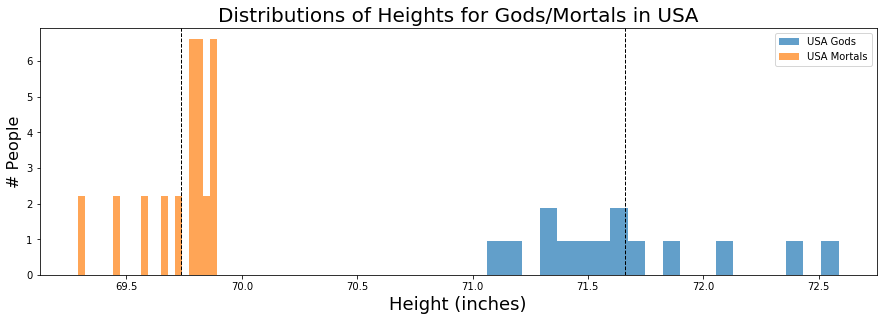

In [26]:
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 2)
plt.title('Distributions of Heights for Gods/Mortals in USA', fontsize=20)
plt.xlabel('Height (inches)', fontsize=18)
plt.ylabel('# People', fontsize=16)
plt.hist(gods_year_pivot['USA'], 20, density=True, alpha=0.7, label="USA Gods")
plt.hist(world_year_pivot['USA'], 20, density=True, alpha=0.7, label="USA Mortals")
plt.axvline(gods_year_pivot['USA'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(world_year_pivot['USA'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

plt.savefig('..\images\dist_allOlympians_USA.png')
# plt.get_figure().savefig('..\images\medalist_nonmedalist_dist.png')

### Distribution of India, Olympian to their average male height

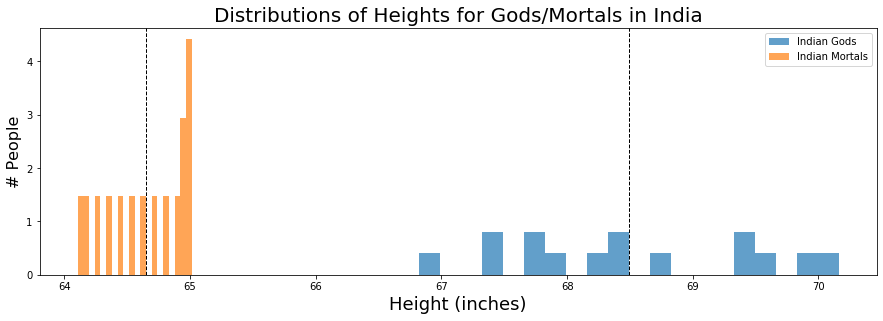

In [24]:
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 2)
plt.title('Distributions of Heights for Gods/Mortals in India', fontsize=20)
plt.xlabel('Height (inches)', fontsize=18)
plt.ylabel('# People', fontsize=16)
plt.hist(gods_year_pivot['IND'], 20, density=True, alpha=0.7, label="Indian Gods")
plt.hist(world_year_pivot['IND'], 20, density=True, alpha=0.7, label="Indian Mortals")
plt.axvline(gods_year_pivot['IND'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(world_year_pivot['IND'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

plt.savefig('..\images\dist_allOlympians_India.png')

### Distribution of Brazil, Olympian to their average male height

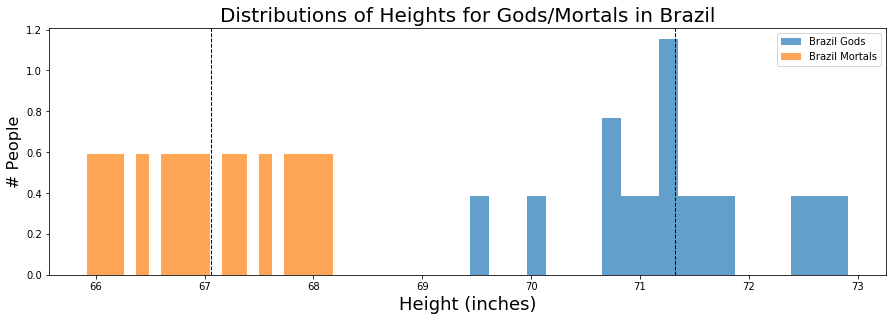

In [25]:
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 2)
plt.title('Distributions of Heights for Gods/Mortals in Brazil', fontsize=20)
plt.xlabel('Height (inches)', fontsize=18)
plt.ylabel('# People', fontsize=16)
plt.hist(gods_year_pivot['BRA'], 20, density=True, alpha=0.7, label="Brazil Gods")
plt.hist(world_year_pivot['BRA'], 20, density=True, alpha=0.7, label="Brazil Mortals")
plt.axvline(gods_year_pivot['BRA'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(world_year_pivot['BRA'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

plt.savefig('..\images\dist_allOlympians_Brazil.png')
# plt.get_figure().savefig('..\images\medalist_nonmedalist_dist.png')